In [1]:
import pandas as pd
from darts import TimeSeries
from moexalgo import Market, Ticker
import datetime

from etna.datasets import TSDataset


from etna.datasets import TSDataset
from etna.analysis import (
    cross_corr_plot,
    distribution_plot,
    acf_plot,
    plot_correlation_matrix,
    plot_trend,
    plot_anomalies,
)

from etna.analysis import (
    get_anomalies_median,
    get_anomalies_density,
    get_anomalies_prediction_interval,
    get_anomalies_hist,
)
from etna.analysis import plot_anomalies

from etna.transforms import LinearTrendTransform, TimeSeriesImputerTransform
from etna.analysis import plot_periodogram, stl_plot, seasonal_plot

import numpy as np
import pandas as pd

from etna.analysis import plot_backtest
from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.models import ProphetModel
from etna.pipeline import Pipeline

import numpy as np
from utils import CompanyStats


libgomp: Invalid value for environment variable OMP_NUM_THREADS

libgomp: Invalid value for environment variable OMP_NUM_THREADS
/home/user/conda/envs/algo/lib/python3.10/site-packages/numba/core/config.py:197: RuntimeWarning: Environment variable 'NUMBA_NUM_THREADS' is defined but its associated value '' could not be parsed.
The parse failed with exception: invalid literal for int() with base 10: ''.
  warnings.warn(f"Environment variable '{name}' is defined but "


In [2]:
import warnings

warnings.filterwarnings(action="ignore")

In [114]:
stats = CompanyStats()

begin_date = '2023-12-05'
candles = stats.get_candles(dates=(begin_date, '2023-12-07'))

start_timestamp = candles.iloc[0]['begin']
start_timestamp

candles['segment'] = candles['begin'].dt.to_period('Y')


candles['timestamp'] = start_timestamp + pd.TimedeltaIndex(candles.index * 10, 'min') # 10 min

candles.rename(columns={'close': 'target'}, inplace=True)

candles.set_index('begin', inplace=True)
# candles
# candles.index

candles


,open,target,high,low,value,volume,segment,timestamp
begin,,,,,,,,
2023-12-05 09:50:00,271.98,271.98,271.98,271.98,25065676.8,92160.0,2023,2023-12-05 09:50:00
2023-12-05 10:00:00,271.97,273.06,273.45,271.51,467357721.2,1715020.0,2023,2023-12-05 10:00:00
2023-12-05 10:10:00,273.06,272.78,273.30,272.60,226986291.3,831530.0,2023,2023-12-05 10:10:00
2023-12-05 10:20:00,272.78,271.30,272.78,271.29,285156379.7,1048140.0,2023,2023-12-05 10:20:00
2023-12-05 10:30:00,271.30,272.03,272.35,271.29,191641141.1,705000.0,2023,2023-12-05 10:30:00
...,...,...,...,...,...,...,...,...
2023-12-07 23:00:00,265.17,265.21,265.45,265.10,23583896.4,88950.0,2023,2023-12-07 02:30:00
2023-12-07 23:10:00,265.22,265.01,265.27,265.01,16541232.0,62400.0,2023,2023-12-07 02:40:00
2023-12-07 23:20:00,265.10,265.17,265.38,265.00,22928346.6,86490.0,2023,2023-12-07 02:50:00


In [ ]:
df = TSDataset.to_dataset(df=candles)
ts = TSDataset(df, freq='10 min')
ts.describe()

In [77]:
ts.segments

['2023']

## EDA

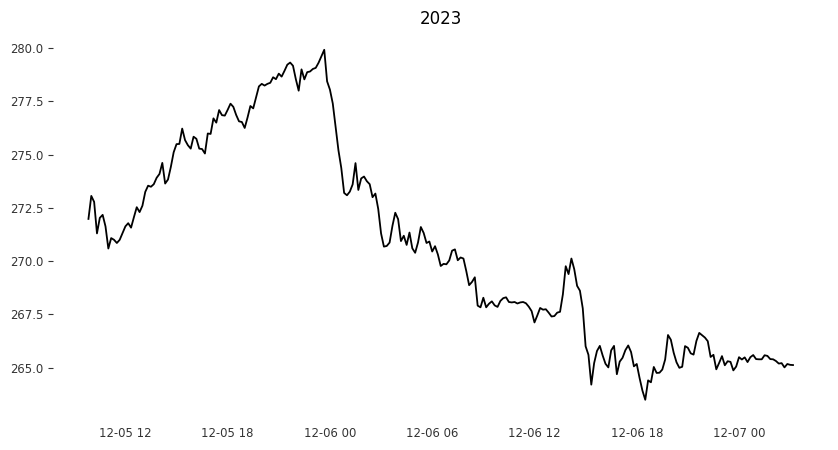

In [5]:
ts.plot()

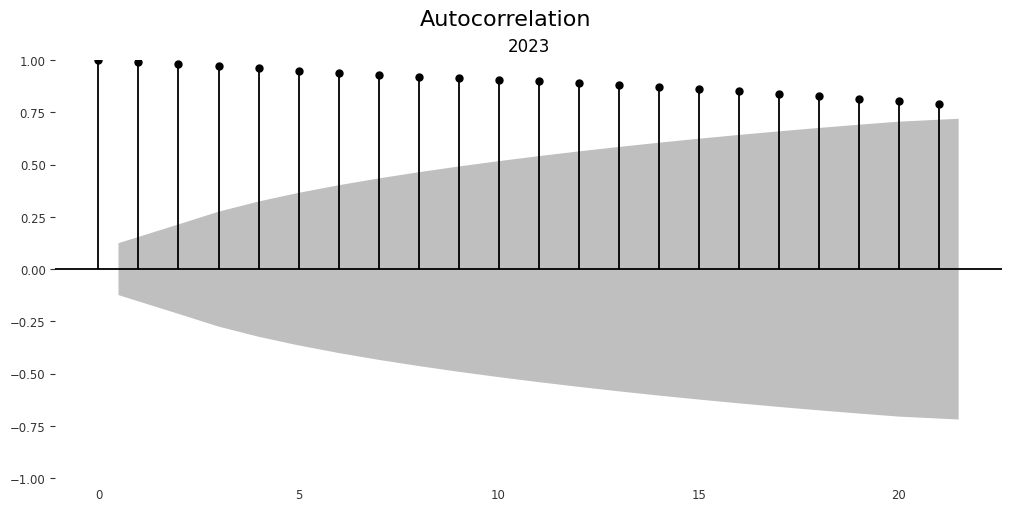

In [8]:
acf_plot(ts)

### Anomalies

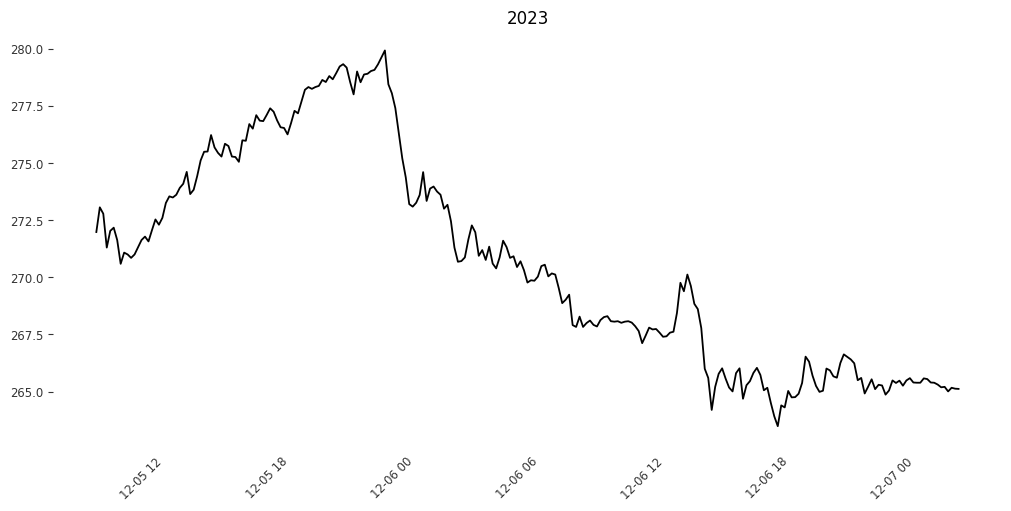

In [6]:
anomaly_dict = get_anomalies_median(ts, window_size=10)
plot_anomalies(ts, anomaly_dict)

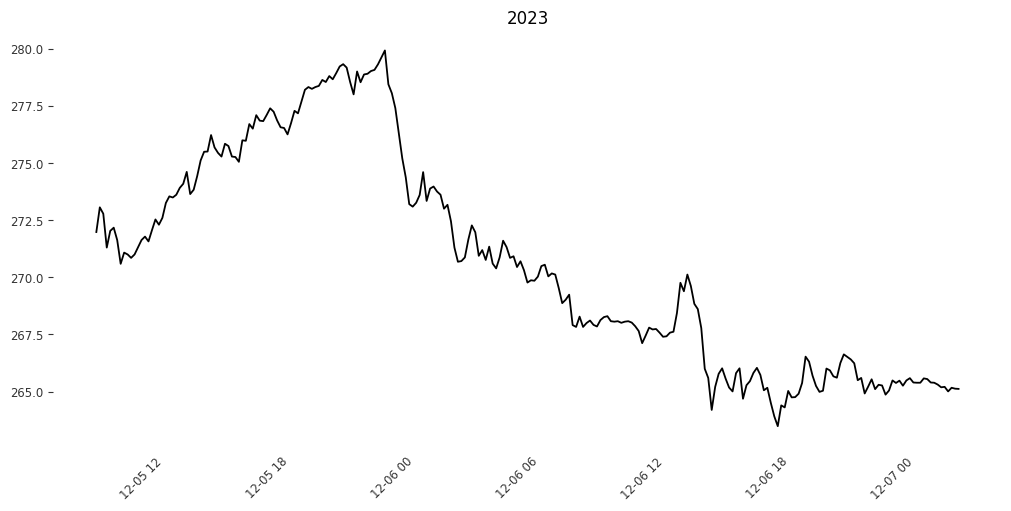

In [7]:
anomaly_dict = get_anomalies_density(ts, window_size=18, distance_coef=1, n_neighbors=4)
plot_anomalies(ts, anomaly_dict)

21:43:38 - cmdstanpy - INFO - Chain [1] start processing
21:43:39 - cmdstanpy - INFO - Chain [1] done processing


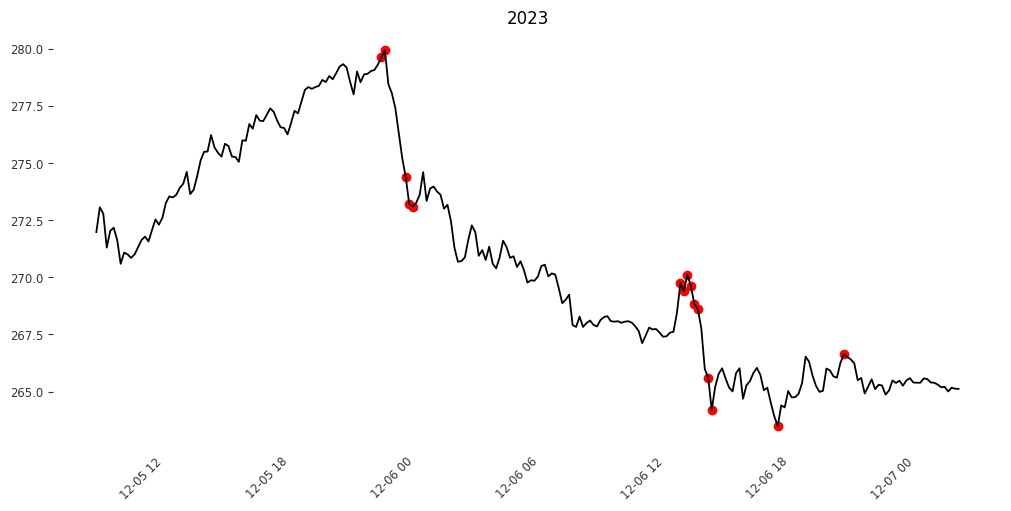

In [9]:
from etna.models import ProphetModel
anomaly_dict = get_anomalies_prediction_interval(ts, model=ProphetModel, interval_width=0.95)
plot_anomalies(ts, anomaly_dict)

## Forecast

In [11]:
HORIZON = 10

In [78]:
ts

segment                2023                                                
feature                high     low    open  target        value     volume
timestamp                                                                  
2023-12-05 09:50:00  271.98  271.98  271.98  271.98   25065676.8    92160.0
2023-12-05 10:00:00  273.45  271.51  271.97  273.06  467357721.2  1715020.0
2023-12-05 10:10:00  273.30  272.60  273.06  272.78  226986291.3   831530.0
2023-12-05 10:20:00  272.78  271.29  272.78  271.30  285156379.7  1048140.0
2023-12-05 10:30:00  272.35  271.29  271.30  272.03  191641141.1   705000.0
...                     ...     ...     ...     ...          ...        ...
2023-12-07 02:30:00  265.45  265.10  265.17  265.21   23583896.4    88950.0
2023-12-07 02:40:00  265.27  265.01  265.22  265.01   16541232.0    62400.0
2023-12-07 02:50:00  265.38  265.00  265.10  265.17   22928346.6    86490.0
2023-12-07 03:00:00  265.21  265.03  265.15  265.13   11441749.6    43160.0
2023-12-07 03:10:00  265.19  265.04  265.13  265.12   38834186.7   146480.0

[249 rows x 6 columns]

### Train test split

### Transforms

In [18]:
from etna.transforms import LagTransform
from etna.transforms import MeanTransform
from etna.transforms import DateFlagsTransform
from etna.transforms import LogTransform

transforms = [
    # LagTransform(in_column="target", lags=list(range(HORIZON, 24)), out_column="lag"),
    MeanTransform(in_column=f"lag_{HORIZON}", window=12),
    LogTransform(in_column="target", inplace=True),
    DateFlagsTransform(
    day_number_in_week=False,
    day_number_in_month=False,
    week_number_in_month=False,
    month_number_in_year=True,
    season_number=True,
    is_weekend=False,
    out_column="date_flag",)
]



In [ ]:
# lag_t = LagTransform(in_column='target', lags=list(range(1, 3)), out_column='lag')
mean_t = MeanTransform(in_column='target', out_column='target_mean', window=5)

mean_t.fit_transform(test_ts).plot(column='target_mean')

In [ ]:
date_flag_t = DateFlagsTransform(out_column='', is_weekend=True)
date_flag_t.fit_transform(train_ts)

In [95]:
train_ts, test_ts = ts.train_test_split(test_size=10)

### Catboost

In [96]:
horizon = 10  # Set the horizon for predictions
from etna.models import CatBoostMultiSegmentModel
model = CatBoostMultiSegmentModel(thread_count=8)
transforms = [MeanTransform(in_column='target', out_column='target_mean', window=5),]
from sklearn.tree import DecisionTreeRegressor

from etna.transforms import TreeFeatureSelectionTransform
# transforms = list(transforms.values())
model_feature_selection = DecisionTreeRegressor(random_state=42)
feature_selector_transform = TreeFeatureSelectionTransform(model=model_feature_selection, top_k=5)

pipeline = Pipeline(model=model, transforms=transforms+[feature_selector_transform], horizon=horizon)

In [97]:
pipeline.fit(ts=train_ts)

Pipeline(model = CatBoostMultiSegmentModel(iterations = None, depth = None, learning_rate = None, logging_level = 'Silent', l2_leaf_reg = None, thread_count = 8, ), transforms = [MeanTransform(in_column = 'target', window = 5, seasonality = 1, alpha = 1, min_periods = 1, fillna = 0, out_column = 'target_mean', ), TreeFeatureSelectionTransform(model = DecisionTreeRegressor(random_state=42), top_k = 5, features_to_use = 'all', return_features = False, )], horizon = 10, )

In [98]:
metrics_baseline, forecast_baseline, _ = pipeline.backtest(ts=ts, metrics=[SMAPE()], n_folds=2)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s


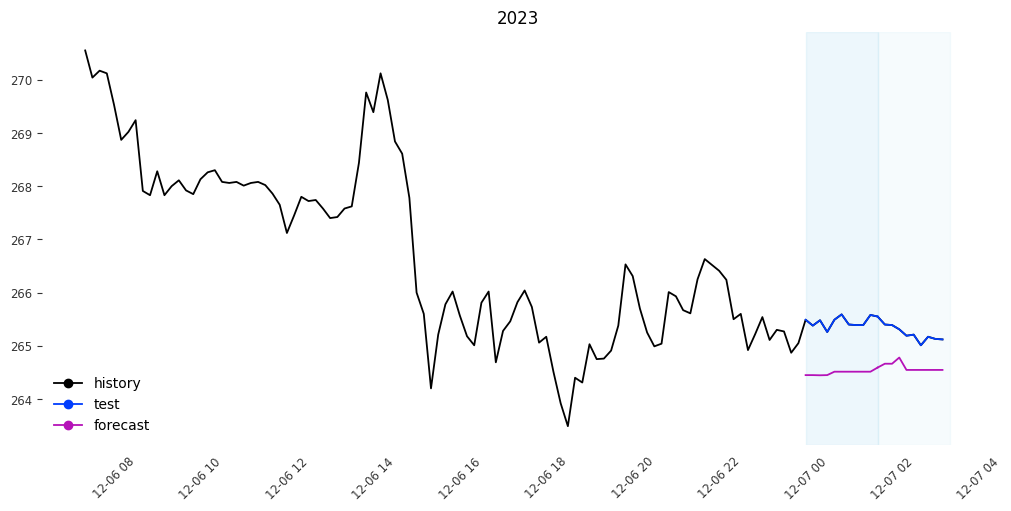

In [99]:
plot_backtest(forecast_baseline, ts, history_len=100, segments=ts.segments[:4])

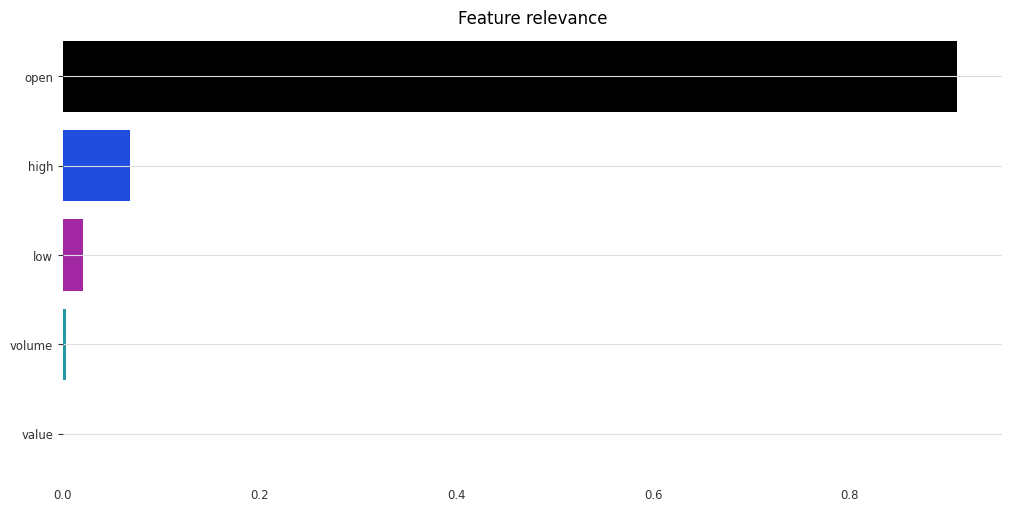

In [111]:
from etna.analysis import plot_feature_relevance
from etna.analysis import ModelRelevanceTable
from copy import deepcopy

temp_ts = deepcopy(test_ts)
# temp_ts.fit_transform(transforms=[feature_selector_transform])

plot_feature_relevance(
    temp_ts,
    relevance_table=ModelRelevanceTable(),
    top_k=20,
    relevance_params={"model": model_feature_selection},
)

### NN

In [101]:
from etna.models.nn import NBeatsInterpretableModel

model_nbeats_interp = NBeatsInterpretableModel(
    input_size=4 * HORIZON,
    output_size=HORIZON,
    loss="smape",
    trend_layer_size=64,
    seasonality_layer_size=256,
    trainer_params=dict(max_epochs=100),
    lr=1e-3,
)

pipeline_nbeats_interp = Pipeline(
    model=model_nbeats_interp,
    horizon=HORIZON,
    transforms=[],
)

In [102]:
pipeline_nbeats_interp.fit(train_ts)


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params
--------------------------------------
0 | model | NBeats      | 229 K 
1 | loss  | NBeatsSMAPE | 0     
--------------------------------------
228 K     Trainable params
650       Non-trainable params
229 K     Total params
0.917     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Pipeline(model = NBeatsInterpretableModel(input_size = 40, output_size = 10, loss = NBeatsSMAPE(), trend_blocks = 3, trend_layers = 4, trend_layer_size = 64, degree_of_polynomial = 2, seasonality_blocks = 3, seasonality_layers = 4, seasonality_layer_size = 256, num_of_harmonics = 1, lr = 0.001, window_sampling_limit = None, optimizer_params = None, train_batch_size = 1024, test_batch_size = 1024, trainer_params = {'max_epochs': 100, 'gradient_clip_val': 1.0, 'logger': []}, train_dataloader_params = {'collate_fn': functools.partial(<function prepare_train_batch at 0x7fe1cc3156c0>, input_size=40, output_size=10, window_sampling_limit=None, random_state=RandomState(MT19937) at 0x7FE1DC1E2340)}, test_dataloader_params = {'collate_fn': functools.partial(<function prepare_test_batch at 0x7fe1cc315750>, input_size=40)}, val_dataloader_params = {'collate_fn': functools.partial(<function prepare_train_batch at 0x7fe1cc3156c0>, input_size=40, output_size=10, window_sampling_limit=None, random_st

In [103]:
forecast_ts = pipeline_nbeats_interp.forecast(test_ts)

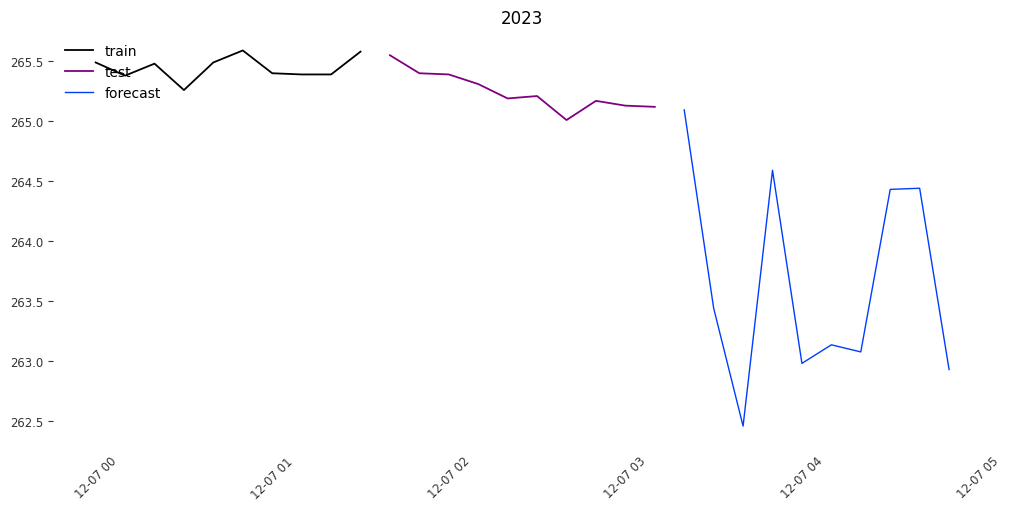

In [110]:
from etna.analysis import plot_forecast

plot_forecast(forecast_ts=forecast_ts, test_ts=test_ts, train_ts=train_ts, n_train_samples=10)

In [112]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()])

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

In [113]:
metrics_df

,segment,MAE,MSE,SMAPE,fold_number
0,2023,0.548723,0.378526,0.206694,0
0,2023,1.241864,1.767136,0.467754,1
0,2023,0.339278,0.152721,0.127966,2
0,2023,0.957219,0.924230,0.361255,3
0,2023,0.650050,0.439461,0.245360,4


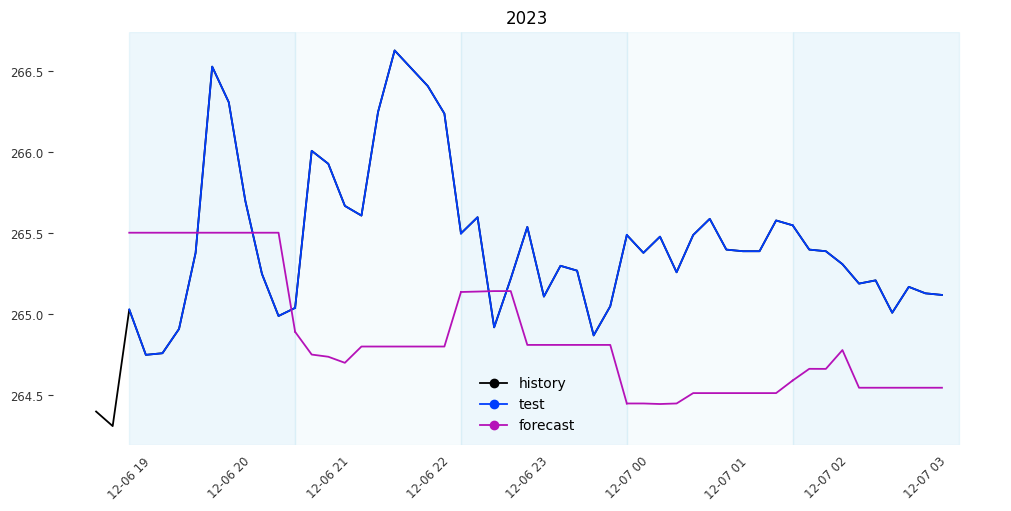

In [109]:
plot_backtest(forecast_df, ts, history_len=2)

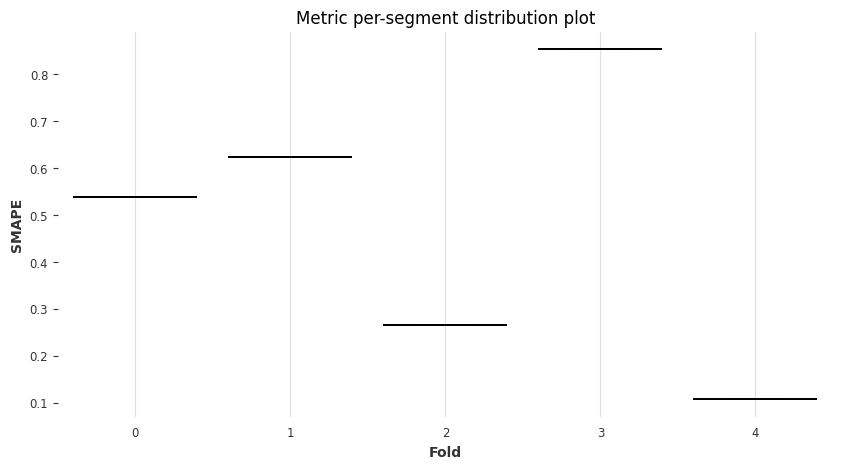

In [95]:
from etna.analysis import metric_per_segment_distribution_plot

metric_per_segment_distribution_plot(metrics_df=metrics_df, metric_name="SMAPE", plot_type="box")
